In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
data = pd.read_csv('/content/annual_temp.csv')
data.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  272 non-null    object 
 1   Year    272 non-null    int64  
 2   Mean    272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [26]:
data.isna().sum()

Source    0
Year      0
Mean      0
dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X=data[['Year']]
Y=data[['Mean']]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

In [104]:
Y_train = Y_train.astype("category")

###Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.fit_transform(Y_test)
# Create a LogisticRegression model
model = LinearRegression()

# Fit the model
model.fit(X_train, Y_train_encoded)

y_predict=model.predict(X_test)
print(y_predict)

[ 33.07922347  12.58259632  40.88746239  84.80880628  23.31892483
  60.40805967  95.54513479  49.67173117 112.13764249  19.41480537
  36.00731307  54.55188049  36.98334293  77.00056737  91.64101533
 131.65823977 134.58632937  64.31217913 110.18558276  52.59982076
 117.01779181  81.88071669  37.95937279  60.40805967 108.23352303
 135.56235923  93.59307506  24.29495469  40.88746239  14.53465605
  68.21629859  80.90468683  88.71292574  45.76761171 103.35337371
  72.12041805  27.22304429  98.47322438 107.25749316  13.55862619
  89.68895561  41.86349225  55.52791035  86.76086601 125.80206059
  30.15113388  46.74364157  50.64776103  32.10319361 120.92191127
  21.3668651   72.12041805 128.73015018 101.40131398  56.50394022
  48.6957013   73.09644791  10.63053659 136.53838909 127.75412032
  41.86349225  32.10319361 132.63426964  78.9526271   25.27098456
 102.37734384 117.01779181  29.17510402  77.97659723  62.3601194
  63.33614927  85.78483615 129.70618004  71.14438818  14.53465605
  94.569104

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


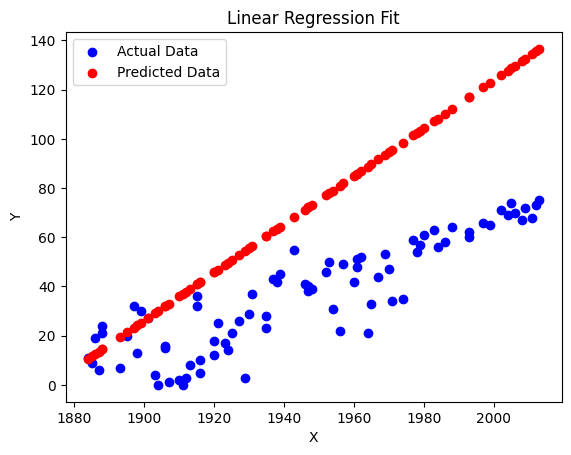

In [106]:
plt.scatter(X_test,Y_test_encoded,color='blue',label='Actual Data')
plt.scatter(X_test,y_predict,color='red',label='Predicted Data')
plt.title('Linear Regression Fit')
plt.xlabel("X")
plt.ylabel('Y')
plt.legend()
plt.show()

In [107]:
model.score(X_train,Y_train_encoded)

0.7618002639687597

In [108]:
model.predict([[2015]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138.49044882])

In [109]:
model.score(X_test,Y_test_encoded)

-2.245506735743273

In [110]:
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.7361686090973418

In [111]:
print(model.predict([[2016]]))
print(model.predict([[2017]]))

[[0.50602829]]
[[0.51284686]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###SVR

In [112]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
model.score(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.926007318107431

In [115]:
print(model.predict([[2016]]))
print(model.predict([[2017]]))

[0.7057749]
[0.52918156]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


###DTR

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
pred = dtr.predict(X_test)
r2_score(Y_test, pred)

0.9812907245638932

In [118]:
print(dtr.predict([[2016]]))
print(dtr.predict([[2017]]))

[0.8845]
[0.8845]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
